## Exercise 10.1 (search)

We want to find the largest and smallest values in a long list of numbers. Implement
two algorithms, based on:

1. Iterating over the list entries; and 
1. First applying a built-in sort operation to the list.

Encapsulate each algorithm in a function. To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

### Solution

We first create the list of random numbers

In [1]:
import numpy as np
x = np.random.rand(1000)

#### Approach 1

In [2]:
def min_max1(x):
    # YOUR CODE HERE
    x_min = x[0]
    x_max = x[-1]
    
    for a in x:
        if a < x_min:
            x_min = a
        elif a > x_max:
            x_max = a
        
    return  x_min, x_max
    
print(min_max1(x))

(0.0023309189794911145, 0.99942682790487003)


#### Approach 2

In [3]:
def min_max2(x):
    # YOUR CODE HERE
    x.sort()
    return x[0], x[-1]

print(min_max2(x))

(0.0023309189794911145, 0.99942682790487003)


In [4]:
assert min_max1(x) == min_max2(x)

In practice, we would use the the NumPy function:

In [5]:
print(np.min(x), np.max(x))

0.00233091897949 0.999426827905


## Exercise 10.2 (Newton's method for root finding)

### Background

Newton's method can be used to find a root $x$ of a function $f(x)$ such that
$$
f(x) = 0
$$
A Taylor series expansion of $f$ about $x_{i}$ reads:
$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$
If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}
In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

### Task

Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here
    
    return x1  # return root
```
where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number 
of iterations, and 
```python
def f(x):
    # Evaluate function at x and return value


def df(x):
    # Evaluate df/dx at x and return value

```

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

Use your program to find the roots of:
$$
f(x) = \tan(x) - 2x
$$
between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ on the same graph, 
and show the roots computed by Newton's method.

Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, showing $x$ and $f$ at each iteration.


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

### Solution

We first implement a Newton solver function:

In [6]:
import numpy as np

def newton(f, df, x, tol=1e-8, max_it=20):
    """Find root of equation defined by function f(x) where df(x) is
    first derivative and x is the initial guess.Optional arguments tol 
    (tolerance) and max_it (maximum number of iterations)"""
    # YOUR CODE HERE
    it = 1
    while it < max_it:
        if abs(f(x)) < tol:
            break

        x = -f(x)/df(x) + x
        print(it, x, f(x))
        it += 1

    if it == max_it and abs(f(x)) > tol:
        raise RuntimeError("Maximum number of iterations exceeded")
        
    return x

We now provide implementations of `f` and `df`, and find the roots:

In [7]:
def f(x):
    # YOUR CODE HERE
    return np.tan(x) - 2*x

def df(x):
    # YOUR CODE HERE
    return 1/np.cos(x)**2 - 2

In [8]:
# YOUR CODE HERE
print(newton(f, df, 1.2))
print("----------")
print(newton(f, df, 0.9)) # Newton's method overshoots and diverges for x0 = 0.9

1 1.16934602445 0.0169993630317
2 1.16560931107 0.000213431151236
3 1.16556119304 3.47355446628e-08
4 1.16556118521 1.33226762955e-15
1.16556118521
----------
1 1.81810024735 -7.59703532419
2 2.3353201133 -5.71328536532
3 67.9231800058 -138.357775853
4 93.9929583099 -188.246400555
5 -107.956063127 213.725235836
6 -164.459914506 326.969101078
7 -281.012333184 555.83632664
8 -295.915889974 591.138531201
9 842.188663411 -1684.13066727
10 -951.043951373 1903.24622812
11 -6520.68932071 13044.4604253
12 -8055.80275591 16110.6565969
13 153762.015194 -307524.126324
14 -156618.76555 313236.141574
15 -493147.753002 986296.208206
16 1452551.08264 -2905099.85855
17 2124863.34608 -4249726.66122
18 -2128937.34258 4257875.39641
19 6488069.38576 -12976141.1283


RuntimeError: Maximum number of iterations exceeded

We can visualise the result:

1 1.16934602445 0.0169993630317
2 1.16560931107 0.000213431151236
3 1.16556119304 3.47355446628e-08
4 1.16556118521 1.33226762955e-15
1 -1.16934602445 -0.0169993630317
2 -1.16560931107 -0.000213431151236
3 -1.16556119304 -3.47355446628e-08
4 -1.16556118521 -1.33226762955e-15


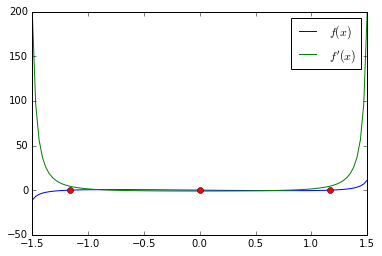

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot f and df/dx
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")

# Add location of roots to plot
# YOUR CODE HERE
root1 = newton(f, df, 1.2)
root2 = newton(f, df, -1.2)
root3 = newton(f, df, 0)
plt.plot([root1, root2, root3], [f(root1), f(root2), f(root3)], 'ro')
plt.legend()

plt.show()

For the extension, we can replace the function `df(x)` with a new version

In [10]:
def df(x):
    # Try changing dx to 1e-15 or smaller
    dx = 1e-15
    # YOUR CODE HERE
    return (f(x+dx) - f(x-dx)) / (2*dx)

In [11]:
# Find roots near -1.2, 0.1, and 1.2
xroots = np.array((newton(f, df, -1.2),
                   newton(f, df, 0.1),
                   newton(f, df, 1.2)))
assert np.isclose(xroots, [-1.16556119e+00, 2.08575213e-10, 1.16556119e+00]).all()

1 -1.17231064353 -0.0306228595629
2 -1.16631442183 -0.00334847591925
3 -1.16562895843 -0.000300584285443
4 -1.1655674261 -2.76735193978e-05
5 -1.16556176108 -2.55349417033e-06
6 -1.16556126108 -3.36439840876e-07
7 -1.16556119221 -3.10509715717e-08
8 -1.16556118585 -2.86578805131e-09
1 -0.00114991181019 0.00114991130335
2 -7.8791958933e-08 7.8791958933e-08
3 -2.85817490531e-16 2.85817490531e-16
1 1.17231064353 0.0306228595629
2 1.16631442183 0.00334847591925
3 1.16562895843 0.000300584285443
4 1.1655674261 2.76735193978e-05
5 1.16556176108 2.55349417033e-06
6 1.16556126108 3.36439840876e-07
7 1.16556119221 3.10509715717e-08
8 1.16556118585 2.86578805131e-09


1 1.17231064353 0.0306228595629
2 1.16631442183 0.00334847591925
3 1.16562895843 0.000300584285443
4 1.1655674261 2.76735193978e-05
5 1.16556176108 2.55349417033e-06
6 1.16556126108 3.36439840876e-07
7 1.16556119221 3.10509715717e-08
8 1.16556118585 2.86578805131e-09
1 -1.17231064353 -0.0306228595629
2 -1.16631442183 -0.00334847591925
3 -1.16562895843 -0.000300584285443
4 -1.1655674261 -2.76735193978e-05
5 -1.16556176108 -2.55349417033e-06
6 -1.16556126108 -3.36439840876e-07
7 -1.16556119221 -3.10509715717e-08
8 -1.16556118585 -2.86578805131e-09


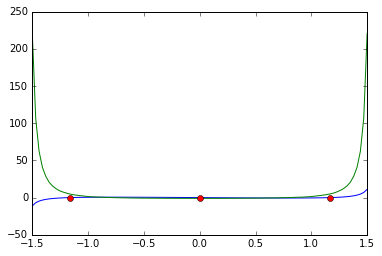

In [12]:
# Plot f, f' and roots

# YOUR CODE HERE
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")

root1 = newton(f, df, 1.2)
root2 = newton(f, df, -1.2)
root3 = newton(f, df, 0)
plt.plot([root1, root2, root3], [f(root1), f(root2), f(root3)], 'ro')

plt.show()

In practice, we could use the Newton function `scipy.optimize.newton` from SciPy (http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) rather than implementing our own function.

## Exercise 10.3 (optional, low pass image filter)

Images files can be loaded and displayed with Matplotlib. An imported image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity. See http://matplotlib.org/users/image_tutorial.html for more background.

Below we fetch an image and display it:

<class 'numpy.ndarray'>
Image array shape: (375, 500, 3)


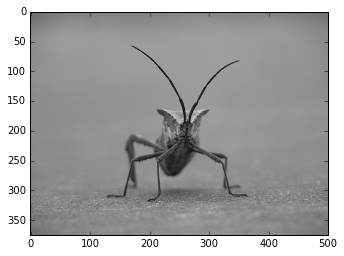

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import image
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png')

# Check type and shape
print(type(img))
print("Image array shape: {}".format(img.shape))

# Display image
plt.imshow(img);

The task is to write a *function* that applies a particular low-pass filter algorithm to an image array 
and  returns the  filtered image. With this particular filter, the value of a pixel in the filtered image 
is equal to the average value of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, 
the neighbours are  `[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

Run the filter algorithm multiple times on the above image to explore the effect of the filter.

*Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
```python
import numpy as np
B = np.zeros_like(A)
```

In [14]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def filter(img):
    new_img = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i == 0 and j == 0:   # Top left corner
                new_img[i, j, :] = (img[i, j+1, :] + img[i+1, j, :])/2
            elif i == 0 and j == (img.shape[1]-1):   # Bottom left corner
                new_img[i, j, :] = (img[i, j-1, :] + img[i+1, j, :])/2
            elif i == (img.shape[0]-1) and j == 0:   # Top right corner
                new_img[i, j, :] = (img[i, j+1, :] + img[i-1, j, :])/2
            elif i == (img.shape[0]-1) and j == (img.shape[1]-1):   # Bottom right corner
                new_img[i, j, :] = (img[i, j-1, :] + img[i-1, j, :])/2                
            elif i == 0:   # Left edge
                new_img[i, j, :] = (img[i, j+1, :] + img[i, j-1, :] + img[i+1, j, :])/3
            elif j == 0:   # Top edge
                new_img[i, j, :] = (img[i, j+1, :] + img[i+1, j, :] + img[i-1, j, :])/3
            elif i == (img.shape[0]-1):   # Right edge
                new_img[i, j, :] = (img[i, j+1, :] + img[i, j-1, :] + img[i-1, j, :])/3
            elif j == (img.shape[1]-1):   # Bottom edge
                new_img[i, j, :] = (img[i, j-1, :] + img[i+1, j, :] + img[i-1, j, :])/3
            else:    
                new_img[i, j, :] = (img[i, j+1, :] + img[i, j-1, :] + img[i+1, j, :] + img[i-1, j, :])/4
                
    return new_img

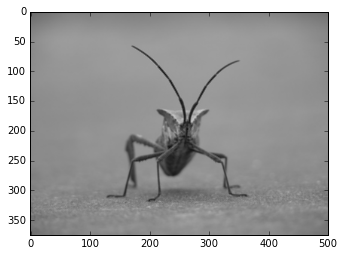

In [15]:
img1 = filter(img)
plt.imshow(img1);

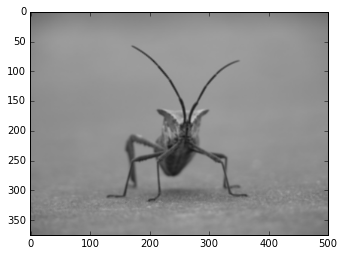

In [16]:
img2 = filter(img1)
plt.imshow(img2);

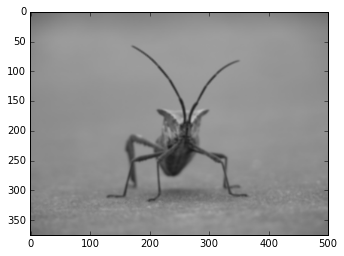

In [17]:
img3 = filter(img2)
plt.imshow(img3);

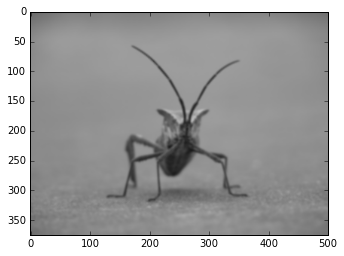

In [18]:
img4 = filter(img3)
plt.imshow(img4);

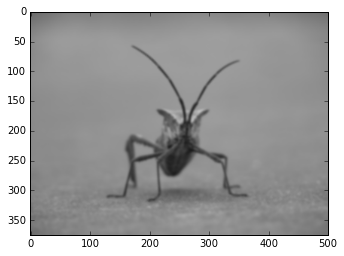

In [19]:
img5 = filter(img4)
plt.imshow(img5);

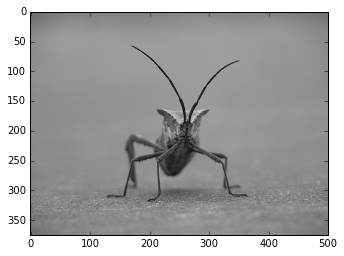

In [20]:
plt.imshow(img);